Air Pollutoin

In [742]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [743]:
df_test=pd.read_csv('./Testing_Data/Test.csv')
df_train=pd.read_csv('./Training_Data/Train.csv')


In [744]:
X=df_train.iloc[:,0:5].values
X_test=df_test.values

In [745]:
X=(X-X.mean())/X.std()

In [746]:
Y=df_train.iloc[:,5:6].values
print(X.shape,Y.shape)

(1600, 5) (1600, 1)


In [747]:
X=X.T
Y=Y.T
print(X.shape,Y.shape)

(5, 1600) (1, 1600)


In [748]:
#get predicted Z
def predicted_value(X,theta,bias):
    #print('predicted_value',np.dot(theta,X) + bias)
    return np.dot(theta,X) + bias

#get J(cost generated)
def cost_func(Z,Y):
    #print('cost_func',(1/(2*Y.shape[1]))*np.sum(np.square(Z-Y)))
    return (1/(2*Y.shape[1]))*np.sum(np.square(Z-Y))

#get gradient
def gradient(X,Y,Z):
    dz=(1/Y.shape[1])*(Z-Y)
    d_theta=np.dot(dz,X.T)
    d_bias=np.sum(dz)
    #print('gradient',d_theta,d_bias)
    return d_theta,d_bias

#gradient decent update
def gradient_decent_update(theta,bias,d_theta,d_bias,learning_rate):
    theta=theta-learning_rate*d_theta
    bias=bias-learning_rate*d_bias
    #print('gradient_decent_update',theta,bias)
    return theta,bias




In [749]:
def linear_regression_model(X,Y,learning_rate=.9):
    costs_train=[]
    theta=np.random.randn(1,X.shape[0])
    bias=0
    for i in range(20):
        Z=predicted_value(X,theta,bias)
        cost=cost_func(Z,Y)
        costs_train.append(cost)
        d_theta,d_bias=gradient(X,Y,Z)
        theta,bias=gradient_decent_update(theta,bias,d_theta,d_bias,learning_rate)
    
    mean_absolute_error=(1/X.shape[1])*np.sum(np.abs(Z-Y))
    return theta,bias,mean_absolute_error,costs_train

In [750]:
theta,bias,mean_absolute_error,costs_train=linear_regression_model(X,Y)

In [751]:
print(theta,bias,mean_absolute_error,costs_train,sep='\n')

[[29.84297081 93.16540718  8.32556432 45.01071403  2.53283406]]
1.4913869905090984
16.44115956737588
[6034.962199908397, 264.8056837220938, 208.92326653772406, 207.80690767266287, 207.7775836627788, 207.77668866723587, 207.77665885592745, 207.7766578131566, 207.7766577757219, 207.7766577743601, 207.77665777431022, 207.77665777430835, 207.77665777430835, 207.7766577743083, 207.7766577743083, 207.7766577743083, 207.77665777430835, 207.7766577743083, 207.7766577743083, 207.7766577743083]


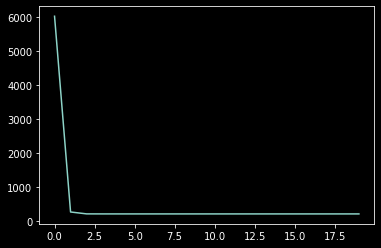

In [752]:
plt.plot(costs_train)

In [753]:
Y_test=predicted_value(X_test.T,theta,bias)
print(Y_test)

[[ 111.67892871  115.12666586  -25.38451475  -47.70203638  -99.96214912
   -48.27565835  -79.50333497   20.42345566  171.25211384  170.2607681
  -109.50105571  -24.44159574   -7.46114547  120.1401012    36.99998855
    42.43428954 -194.18437616   19.20860754    8.17756117  133.55547754
    61.74192257  -65.85160206 -112.30857873  -10.97902554  -62.36826246
     8.42683726   25.86966015  104.74538943   20.75124601  -29.77336654
   108.04369164  -48.64996463  214.44996164  -17.46250263 -233.37060443
   152.21005756   -5.76458314    9.26542081 -313.5078994    74.00261185
   -85.1753456  -211.28110247 -243.58544562  131.96209815  -77.67843543
   102.50944271   -7.13690665   17.1895467  -102.07740473  -31.19292253
     7.34793543 -178.9371108    61.982719   -101.8639012  -110.25466753
  -160.31522894   59.34885216  105.69191109  -78.54196151   38.43951321
    37.92137654  -54.60671167  162.2555262    40.27337338   53.71950048
    20.72538344   78.59402293   -5.33949769   -6.64082954   -1.70

(1, 400)